In [383]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analiticsLabels import *

DATA = 'data'
V = 'v'
FOV = 'fov'


files = [
    {
        DATA: pd.read_csv('data/3-tree-xvel-10-fov-60.csv'),
        FOV: '60',
        V: '1.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-20-fov-60.csv'),
        FOV: '60',
        V: '2.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-30-fov-60.csv'),
        FOV: '60',
        V: '3.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-40-fov-60.csv'),
        FOV: '60',
        V: '4.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-10-fov-30.csv'),
        FOV: '30',
        V: '1.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-20-fov-30.csv'),
        FOV: '30',
        V: '2.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-30-fov-30.csv'),
        FOV: '30',
        V: '3.0'
    },
    {
        DATA: pd.read_csv('data/3-tree-xvel-40-fov-30.csv'),
        FOV: '30',
        V: '4.0'
    },
]

In [388]:
def no_outlier(data, m=1):
    data = np.array(data)
    mean = np.mean(data)
    standard_deviation = np.std(data)
    distance_from_mean = abs(data - mean)
    not_outlier = distance_from_mean < m * standard_deviation
    return data[not_outlier]


stop = lambda i, N, arr: i < len(arr) - (N - 1)


def filter_activations(activations):
    # Filter activations to remove outliers
    filt_act = no_outlier(activations)
    # Also when the gradient is negative
    filt_act = filt_act[np.gradient(filt_act) > 0]
    threshold = (np.mean(filt_act) + 
                 0.4 * np.std(filt_act))
    return filt_act, threshold
    

def check_threshold(arr, threshold):
    return arr > threshold
    

def make_decision(activations, threshold, minimum):
    split = int(minimum / 2)
    num = len(activations)
    stays_p = check_threshold(activations, threshold)
    return [False] * (split + 1) + [np.all(stays_p[i - split : i + split])
            for i in range(num) if i > split]
    
    

def test_activations(df, N=5, grad_width=5, fov='60', v='2'):
    # Sort by position
    df.sort_values(POSITION)
    activations, threshold = filter_activations(df[ACTIVATION])
    
    decision = make_decision(activations, threshold, 4)
    s = decision * activations
    s[s == 0] = np.nan
    
    # Create two subplots and unpack the output array immediately
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    f.suptitle('Activations for v=' + v + ' and FOV=' + fov)
    ax1.plot(-df[POSITION], df[ACTIVATION], color='green', label='Original activation')
    ax1.set_title('Original activation')
    ax1.set_ylim(bottom=-0.1)
    pos = np.linspace(np.max(df[POSITION]), np.min(df[POSITION]), len(activations))
    ax2.set_title('Processed activation')
    ax2.plot(-pos, activations, label='Processec activation')
    ax2.plot(-pos, [threshold] * len(activations), '--', color='gray', label='Threshold')
    ax2.plot(-pos, s, label='Classified as obstacle')
    ax2.set_xlabel('Distance (m)')
    f.tight_layout(rect=[0, 0.03, 1, 0.95])
    f.savefig('figs/processed-activation-v-' + v + '-fov-' + fov + '.pdf')
    
    
    
     
    
    
    
    

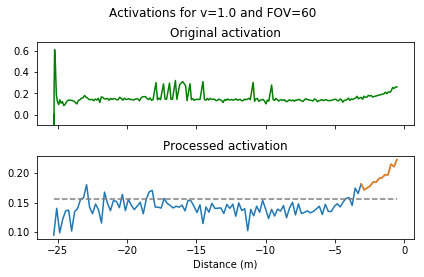

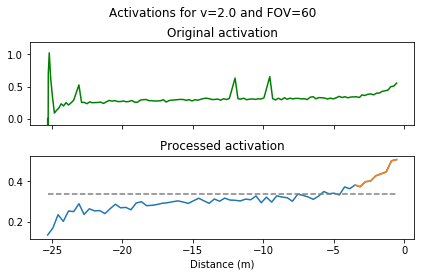

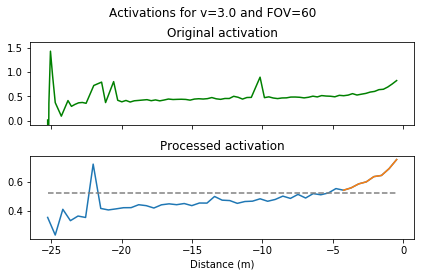

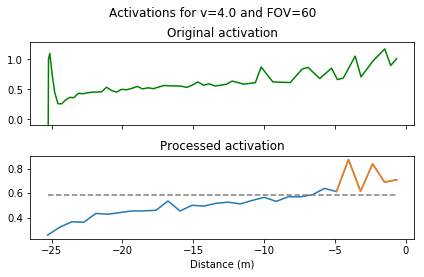

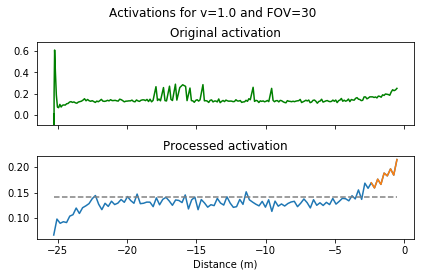

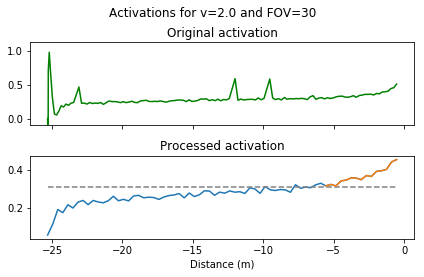

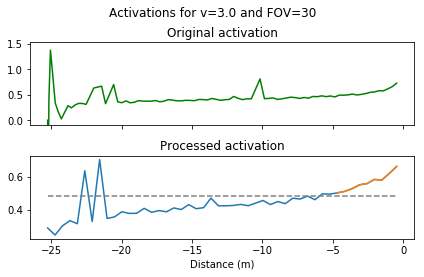

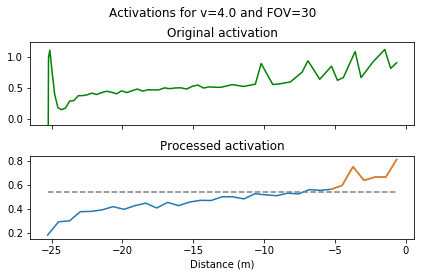

In [389]:
for f in files:
    test_activations(f[DATA], fov=f[FOV], v=f[V])